 # using *Sklearn* (2D data)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [20]:
X , y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, random_state=13, noise=20)

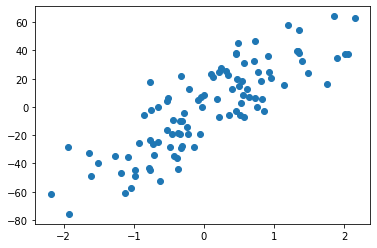

In [21]:
plt.scatter(X,y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [71]:
def ridgechecker(alpha_val):
    lr = Ridge(alpha_val)
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('-----using scikit learn-----')
    print('alpha === ',alpha_val)
    print('r2_score ::: ',r2_score(y_test,y_pred)*100)  
    print('slope ::: ',lr.coef_)
    print('intercept :::',lr.intercept_)

In [72]:
ridgechecker(0.1)

-----using scikit learn-----
alpha ===  0.1
r2_score :::  63.468014107728024
slope :::  [28.08885585]
intercept ::: -2.269134546759879


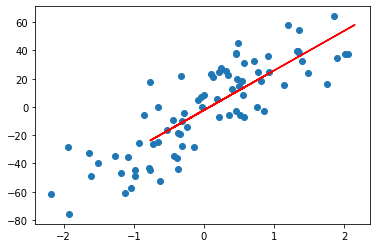

In [73]:
plt.plot(X_test,lr.predict(X_test), color= 'red')
plt.scatter(X_train,y_train)

 # using *Formulation* (2D data)

In [74]:
class RidgeRegression:
    
    def __init__(self,alpha):
        self.alp = alpha
        self.m = 1
        self.b = 0
    
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        X_bar = np.mean(X_train)
        y_bar = np.mean(y_train)
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_bar) * (y_train[i] - y_bar))
            den = den + ((X_train[i] - X_bar) * (X_train[i] - X_bar))
            
        self.m = num / (den + self.alp)
        self.b = y_bar - (self.m * X_bar)
        
    def predict(self, X_test):
        y_pred = (self.m * X_test) + self.b
        return y_pred

In [75]:
def ridgechecker2(alpha_val):
    lrf = RidgeRegression(alpha_val)
    lrf.fit(X_train, y_train)
    y_pred = lrf.predict(X_test)
    print('-----using formulation-----')
    print('alpha === ',alpha_val)
    print('r2_score ::: ',r2_score(y_test,y_pred)*100)  
    print('slope ::: ',lrf.m)
    print('intercept :::',lrf.b)

In [76]:
ridgechecker2(0.1)
ridgechecker(0.1)

-----using formulation-----
alpha ===  0.1
r2_score :::  63.468014107727996
slope :::  [28.08885585]
intercept ::: [-2.26913455]
-----using scikit learn-----
alpha ===  0.1
r2_score :::  63.468014107728024
slope :::  [28.08885585]
intercept ::: -2.269134546759879


 # using *Sklearn* (n-D data)

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [78]:
X,y = load_diabetes(return_X_y=True) 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
def ndridgechecker(alpha_val):
    lr = Ridge(alpha_val, solver='cholesky')
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    print('-----using scikit learn-----')
    print('alpha === ',alpha_val)
    print('r2_score ::: ',r2_score(y_test,y_pred)*100)  
    print('slope ::: ',lr.coef_)
    print('intercept :::',lr.intercept_)

In [99]:
ndridgechecker(0.1)

-----using scikit learn-----
alpha ===  0.1
r2_score :::  45.19973816947851
slope :::  [   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
intercept ::: 151.92548050708137


   # using *Formulation* (n-D data)

In [114]:
class ndRidgeRegression:
    
    def __init__(self,alpha):
        self.m = 1
        self.b = 0
        self.alp = alpha
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        Id_mat = np.identity(X_train.shape[1])
        Id_mat[0][0] = 0  # according to documentation the first value of identity matrix is intialised to zero
        fxn = np.linalg.inv(np.dot(X_train.T,X_train) + (self.alp * Id_mat)).dot(X_train.T).dot(y_train)
        self.b = fxn[0]
        self.m = fxn[1:]
    
    def predict(self,X_test):
        y_pred = np.dot( X_test,self.m ) + self.b
        return y_pred

In [115]:
def ndridgechecker2(alpha_val):
    lrf = ndRidgeRegression(alpha_val)
    lrf.fit(X_train, y_train)
    y_pred = lrf.predict(X_test)
    print('-----using formulation-----')
    print('alpha === ',alpha_val)
    print('r2_score ::: ',r2_score(y_test,y_pred)*100)  
    print('slope ::: ',lrf.m)
    print('intercept :::',lrf.b)

In [116]:
ndridgechecker2(0.1)
ndridgechecker(0.1)

-----using formulation-----
alpha ===  0.1
r2_score :::  45.19973816947851
slope :::  [   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
intercept ::: 151.9254805070814
-----using scikit learn-----
alpha ===  0.1
r2_score :::  45.19973816947851
slope :::  [   6.64275308 -172.24216584  485.52387163  314.68212174  -72.93932312
  -80.59005344 -174.46651489   83.61665316  484.36328537   73.58415414]
intercept ::: 151.92548050708137
